### Stock Market Prediction And Forecasting Using Stacked LSTM

In [38]:
import pandas as pd
import yfinance as yf
import numpy as np
import keras

In [39]:
INFY = yf.download(tickers='INFY.NS',start='2016-03-1',end='2021-04-10')
df1 = INFY.drop(['Open','High','Adj Close','Volume','Low'],axis=1)

[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.show(*args, **kw)>

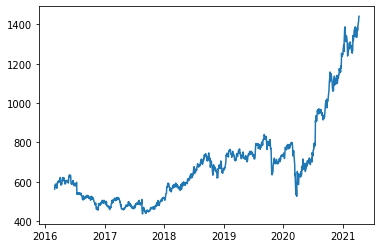

In [40]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show

In [41]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [43]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [44]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [45]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [47]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
716/716 [==============================] - 6s 8ms/sample - loss: 0.0131 - val_loss: 0.0630
Epoch 2/100
716/716 [==============================] - 2s 3ms/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 3/100
716/716 [==============================] - 2s 3ms/sample - loss: 0.0012 - val_loss: 0.0042
Epoch 4/100
716/716 [==============================] - 2s 3ms/sample - loss: 6.0994e-04 - val_loss: 0.0061
Epoch 5/100
716/716 [==============================] - 2s 3ms/sample - loss: 4.4070e-04 - val_loss: 0.0036
Epoch 6/100
716/716 [==============================] - 2s 3ms/sample - loss: 4.2816e-04 - val_loss: 0.0031
Epoch 7/100
716/716 [==============================] - 2s 3ms/sample - loss: 4.2850e-04 - val_loss: 0.0034
Epoch 8/100
716/716 [==============================] - 3s 4ms/sample - loss: 3.9151e-04 - val_loss: 0.0034
Epoch 9/100
716/

716/716 [==============================] - 3s 4ms/sample - loss: 1.8752e-04 - val_loss: 0.0028
Epoch 74/100
716/716 [==============================] - 2s 3ms/sample - loss: 1.7899e-04 - val_loss: 0.0040
Epoch 75/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.8011e-04 - val_loss: 0.0029
Epoch 76/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.8012e-04 - val_loss: 0.0046
Epoch 77/100
716/716 [==============================] - 3s 4ms/sample - loss: 2.1201e-04 - val_loss: 0.0039
Epoch 78/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.8380e-04 - val_loss: 0.0031
Epoch 79/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.8348e-04 - val_loss: 0.0037
Epoch 80/100
716/716 [==============================] - 3s 4ms/sample - loss: 2.0288e-04 - val_loss: 0.0062
Epoch 81/100
716/716 [==============================] - 3s 4ms/sample - loss: 1.9156e-04 - val_loss: 0.0021
Epoch 82/100
716/716 [===================

In [51]:
import tensorflow as tf

In [52]:
tf.__version__

'1.14.0'

In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [54]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

588.4704530491406

In [56]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

945.2671405523738

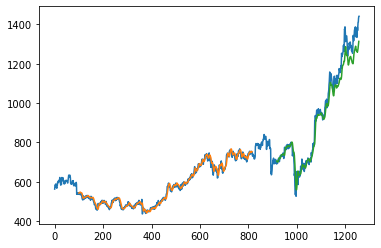

In [57]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [58]:
len(test_data)

441

In [59]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [61]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.89047915]
101
1 day input [0.68452224 0.68402441 0.67093146 0.65719118 0.66376257 0.70010448
 0.70030369 0.67600935 0.67356989 0.66042711 0.69811315 0.70114998
 0.6867625  0.69492705 0.7037387  0.71354601 0.73530135 0.72788367
 0.72335333 0.72469758 0.7147906  0.7258425  0.71937065 0.74983821
 0.73739235 0.7804052  0.81281426 0.7958879  0.80011949 0.81007618
 0.80659133 0.81555235 0.82018212 0.84786176 0.85338777 0.84173837
 0.82187483 0.87160843 0.93543078 0.9310001  0.94633343 0.92975552
 0.90431613 0.87155872 0.87613878 0.89883995 0.89908887 0.90023391
 0.88455213 0.86055654 0.8358639  0.7988749  0.82063024 0.83093539
 0.84427737 0.83900028 0.83178168 0.86309554 0.86508688 0.85607603
 0.85224273 0.86931847 0.86916909 0.85000247 0.84094191 0.85204352
 0.8508986  0.82491154 0.82605659 0.83397223 0.83422114 0.81306318
 0.8267038  0.86404138 0.90292229 0.88977939 0.87618849 0.89515603
 0.90491363 0.92741572 0.93408665 0.93284207 0.94319705 0.94618405
 0.89650015 0.9038183  0.93005427

16 day output [[0.6032149]]
17 day input [0.73530135 0.72788367 0.72335333 0.72469758 0.7147906  0.7258425
 0.71937065 0.74983821 0.73739235 0.7804052  0.81281426 0.7958879
 0.80011949 0.81007618 0.80659133 0.81555235 0.82018212 0.84786176
 0.85338777 0.84173837 0.82187483 0.87160843 0.93543078 0.9310001
 0.94633343 0.92975552 0.90431613 0.87155872 0.87613878 0.89883995
 0.89908887 0.90023391 0.88455213 0.86055654 0.8358639  0.7988749
 0.82063024 0.83093539 0.84427737 0.83900028 0.83178168 0.86309554
 0.86508688 0.85607603 0.85224273 0.86931847 0.86916909 0.85000247
 0.84094191 0.85204352 0.8508986  0.82491154 0.82605659 0.83397223
 0.83422114 0.81306318 0.8267038  0.86404138 0.90292229 0.88977939
 0.87618849 0.89515603 0.90491363 0.92741572 0.93408665 0.93284207
 0.94319705 0.94618405 0.89650015 0.9038183  0.93005427 0.93080102
 0.91307806 0.89321452 0.89560403 0.94449146 0.92731618 0.9443918
 0.96898489 0.97012994 0.9891969  0.99880512 1.         0.89047915
 0.87526441 0.84694976 0.8

29 day output [[0.5515693]]
[[0.8904791474342346], [0.8752644062042236], [0.8469497561454773], [0.814034640789032], [0.7812679409980774], [0.7507820129394531], [0.7234012484550476], [0.6993792653083801], [0.6787160634994507], [0.6612727046012878], [0.6468138694763184], [0.6350322961807251], [0.625569760799408], [0.6180402040481567], [0.6120516657829285], [0.6072258353233337], [0.6032149195671082], [0.5997126698493958], [0.5964642763137817], [0.5932679772377014], [0.5899761319160461], [0.5864922404289246], [0.5827646255493164], [0.5787801146507263], [0.5745558142662048], [0.5701307058334351], [0.5655581951141357], [0.5608993172645569], [0.5562164783477783], [0.5515692830085754]]


In [62]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [63]:
import matplotlib.pyplot as plt

In [64]:
len(df1)

1258

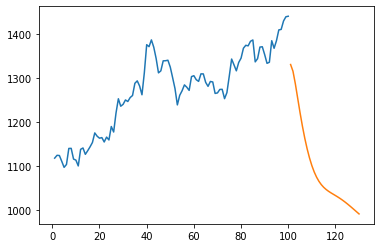

In [66]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

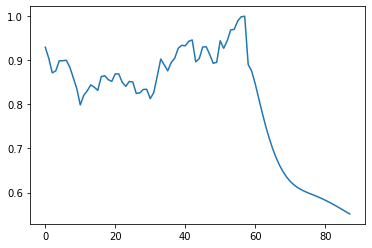

In [67]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [68]:
df3=scaler.inverse_transform(df3).tolist()

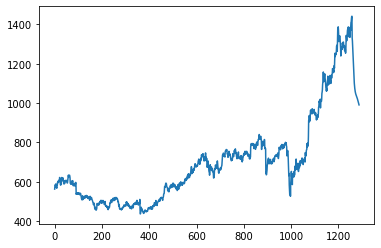

In [69]:
plt.plot(df3)